In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import seaborn as sns
import scipy.stats as st

from scipy.stats import linregress

# Import API key
# from config import g_key

In [ ]:
# Files to Load (Remember to Change These)
fast_food_restaurants_2018 = "../Resources/Fast_Food_Restaurants_2018.csv"
census1_2018 ="../Resources/census_data_clean_2018.csv"
# Read files into Pandas DF
Rest_2018 = pd.read_csv(fast_food_restaurants_2018)
census2_2018=pd.read_csv(census1_2018)

In [ ]:
# remove columns we will not need
Rest_2018=Rest_2018.drop(['id','sourceURLs','websites'], axis =1)
Rest_2018.columns

In [ ]:
# reorganize/rename columns
Rest_2018 = Rest_2018.rename(columns={'name':'Name', 'address': 'Address', 'city': 'City', 'country': 'Country', 'latitude': 'Latitude', 'longitude':'Longitude', 'postalCode': 'Zip Code',\
                                     'province': 'State'})
Rest_2018 = Rest_2018[['Name', 'Address', 'City','State', 'Zip Code','Country', 'Latitude', 'Longitude']]
Rest_2018.head()

In [ ]:
# get unique names in list and sort alphabetically to assist with cleaning
names = Rest_2018['Name'].unique()
names.sort()
print(len(names))
print(names)

In [ ]:
Rest_2018['Name'] = Rest_2018['Name'].replace({"Arby's - Closed":"Arby's",'Arbys': "Arby's", "Auntie Anne's": "Auntie Anne's Pretzels","Baker's Drive Thru":"Baker's Drive-thru","Ben and Jerry's": "Ben & Jerry's",'Bob Evans Restaurant':'Bob Evans',"Bojangles' Famous Chicken 'n Biscuits": 'Bojangles', 'Burger King¬Æ': 'Burger King','Capri Italian Restaurant':'Capri Restaurant',"Carl's Jr.":"Carl's Jr","Carl's Jr. / Green Burrito":"Carl's Jr","Carl's Jr / Green Burrito":"Carl's Jr",'Caseys Carry Out Pizza':"Casey's General Store","Charley's Grilled Subs":'Charleys Philly Steaks',"Checker's Pizza":'Checkers','Chick-fil-A':'Chick-Fil-A', 'Chipotle':'Chipotle Mexican Grill','Dairy Queen (Treat Only)':'Dairy Queen','Dunkin Donuts':"Dunkin' Donuts",'Five Guys Burgers Fries':'Five Guys', 'Five Guys Burgers And Fries':'Five Guys',"Foster's Freeze":'Fosters Freeze', "Hardee's":'Hardees',"Hardee's / Red Burrito":'Hardees', "Hardee's/red Burrito":'Hardees','Jack in the Box':'Jack In The Box', 'Jack in the Box -':'Jack In The Box'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Jimmy John's":'Jimmy Johns','KFC - Kentucky Fried Chicken':'KFC','KFC/AW':'KFC','KFC/Long John Silvers':'KFC', 'KFC/Taco Bell':'KFC'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Little Caesar's Pizza":'Little Caesars', 'Little Caesars Pizza':'Little Caesars',"Long John Silver's / AW" 'Long John Silvers':"Long John Silver's",'Long John Silvers / A&W':"Long John Silver's",'Mc Donalds':"McDonald's","McDonald's of Rolesville":"McDonald's",'McDonalds':"McDonald's","McDonalds's":"McDonald's","Mcdonald's":"McDonald's",'Mcdonalds':"McDonald's",'Mcdonalds Whitehouse':"McDonald's"})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Panda Express Innovation Kitchen':'Panda Express' ,'PepperJax Grill':'Pepperjax Grill',"Popeye's Louisiana Kitchen":'Popeyes','Popeyes Chicken & Biscuits':'Popeyes','Popeyes Chicken Biscuits':'Popeyes','Popeyes Louisiana Kitchen':'Popeyes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'QDOBA Mexican Eats':'Qdoba Mexican Grill', 'Qdoba Mexican Eats':'Qdoba Mexican Grill', "Quizno's": 'Quiznos', 'Quiznos Sub':'Quiznos',"Raising Cane's":'Raising Canes', "Raising Cane's Chicken Fingers":'Raising Canes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Rally's Hamburgers":"Rally's", 'Rallys':"Rally's",'Roma Pizza':'Romas Pizza','SONIC Drive In': 'SONIC Drive-In', 'SUBWAY¬Æ':'SUBWAY'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Sonic':'SONIC Drive-In', "Sonic America's Drive-In":'SONIC Drive-In','Sonic Drive In':'SONIC Drive-In','Sonic Drive in':'SONIC Drive-In','Sonic Drive-In':'SONIC Drive-In',"Steak 'n Shake":'Steak N Shake','Taco Bell / KFC':'Taco Bell' ,'Taco Bell/KFC':'Taco Bell','Taco Bell/Pizza Hut':'Taco Bell'})
Rest_2018['Name'] = Rest_2018['Name'].replace({ 'Wienerschitzel':'Wienerschnitzel','Wingstop Restaurant':'Wingstop',"Wolf's Dairy Queen" :'Dairy Queen',"Zaxby's Chicken Fingers & Buffalo Wings": "Zaxby's",'b.good':'B.GOOD', 'A&W/Long John Silvers':"Long John Silver's"})
# After going through team decided to rename Pizza Hut, Taco Bell and KFC to YUM Brands
Rest_2018['Name'] = Rest_2018['Name'].replace({'Pizza Hut': 'YUM Brands', 'KFC': 'YUM Brands','Taco Bell': 'YUM Brands'})

In [ ]:
print(len(Rest_2018))


In [ ]:
# Remove locations that are not food related 'Walmart Supercenter''T-Mobile''Hilton Boston Logan Airport''7-Eleven'
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames= Rest_2018[(Rest_2018['Name']=='Walmart Supercenter')].index
Rest_2018.drop(indexNames, inplace=True)

In [ ]:
indexNames= Rest_2018[(Rest_2018['Name']=='T-Mobile')].index
Rest_2018.drop(indexNames, inplace=True)

In [ ]:
indexNames= Rest_2018[(Rest_2018['Name']=='Hilton Boston Logan Airport')].index
Rest_2018.drop(indexNames, inplace=True)

In [ ]:
indexNames= Rest_2018[(Rest_2018['Name']=='7-Eleven')].index
Rest_2018.drop(indexNames, inplace=True)
print(len(Rest_2018))
Rest_2018['Name'].nunique()

In [ ]:
# find number of entries for each location
Rest_2018['Name'].value_counts()

In [ ]:
# Remove all locations that have less than 50 entries
# https://www.thetopsites.net/article/58467286.shtml
threshold = 50
clean_rest_2018 = Rest_2018[Rest_2018.groupby('Name')['Name'].transform('count')>threshold].copy()
print(len(clean_rest_2018))
clean_rest_2018['Name'].value_counts()

In [ ]:
# export to csv as this is clean data incase anything happens while added in other informatoin
clean_rest_2018.to_csv('../Resources/clean_rest_2018.csv', encoding='utf-8', index = False)

In [ ]:
# combine with chipotle csv
# first read get file then read into pandas DF
Chipotle_stores = "../Resources/chipotle_stores.csv"
chipotle = pd.read_csv(Chipotle_stores)
chipotle.head(2)
print(len(chipotle))

In [ ]:
clean_rest_2018.head(2)
print(len(clean_rest_2018))

In [ ]:
all_rest_df = pd.concat([chipotle, clean_rest_2018])
print(len(all_rest_df))
all_rest_df

In [ ]:
# Add census data to right of all rest data
census2_2018.head(2)

In [ ]:
# Converted to string because restaurant data information was listed as string and could not merge properly
# Adjusted series name to allow proper merge as well
# Confirm number of zip codes with less than 5 digits
census2_2018['Zipcode'] = census2_2018['Zipcode'].astype(str)
census_2018 = census2_2018.rename(columns={'Zipcode': 'Zip Code'})
census_2018_badzip= census_2018[census_2018['Zip Code'].str.len()<5]
print(census_2018_badzip)

In [ ]:
#Research confirms that for the cities and states with zip codesless than 5 digits, the zip codes begin with 0.
#Excel truncates the leading zero. (#e.g. 06001 becomes 6001 in Excel) 

def format_postal_codes(row):
    zipcode= row['Zip Code']
    return zipcode[:5].zfill(5)

In [ ]:
# Fix zip codes to have 5 digits
census_2018['Zip Code'] = census_2018.apply(format_postal_codes, axis=1)

census_2018_badzip = census_2018[census3_2018['Zip Code'].str.len()<5]
print(census_2018_badzip)


In [ ]:
# Add census data to right of all rest data
all_rest_new = pd.merge(all_rest_df,census_2018, on="Zip Code", how='left')
all_rest_new.head(50)

In [ ]:
# Remove and rename extra lat/long columns
all_rest_new = all_rest_new.rename(columns={'Latitude_x': 'Latitude', 'Longitude_x':'Longitude'})
all_rest_df = all_rest_new[['Name', 'Address', 'City','State', 'Zip Code','Country', 'Latitude', 'Longitude','Population', 'Median Age', 'Household Income','Per Capita Income', 'Poverty Count', 'Poverty Rate']]
all_rest_df.tail(50)

In [ ]:
# Export to CSV for others to use
all_rest_df.to_csv("Resources/All_rest_2018.csv", encoding="utf-8", index=False)

In [ ]:
all_rest_df['Population'].describe()

In [ ]:
# configure gmaps with API key
gmaps.configure(api_key =g_key)

In [ ]:
# Store lat/long into locations
locations = census_2018[['Latitude', 'Longitude']]

# Store humidity as weight
weight = census_2018['Population']

# Set Chipotle markers
chip_locations = chipotle[['Latitude', 'Longitude']]
# Set McDonalds markers
mcdon_locations = all_rest_df.loc[all_rest_df['Name']=='McDonald\'s'] 
mcdonlatlong=mcdon_locations[['Latitude', 'Longitude']]
# Set yum brand locations (Taco Bell, Pizza Hut and KFC)
yum_locations = all_rest_df.loc[all_rest_df['Name']=='YUM Brands']
yumlatlong=yum_locations[['Latitude', 'Longitude']]
# Set Burger King
bk_locations = all_rest_df.loc[all_rest_df['Name']=='Burger King']
bklatlong=bk_locations[['Latitude', 'Longitude']]

In [ ]:
fig = gmaps.figure()

heat_layer=gmaps.heatmap_layer(locations, weight, dissipating=True, max_intensity=25, point_radius=2)

chip_layer = gmaps.symbol_layer(
    chip_locations, fill_color='black', stroke_color='black', scale=1)

yum_layer = gmaps.symbol_layer(
    yumlatlong, fill_color='green', stroke_color='green', scale=1)

bk_layer = gmaps.symbol_layer(
    bklatlong, fill_color='green', stroke_color='green', scale=1)

fig.add_layer(heat_layer)
fig.add_layer(chip_layer)
fig.add_layer(yum_layer)
fig.add_layer(bk_layer)


fig

In [61]:
# Set up binns for population on all_rest_df
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
all_rest_df['Zip Code Population Bins'] = pd.cut(all_rest_df['Population'], bins, labels = group_names, include_lowest =True)
all_rest_df['Zip Code Population Bins'].value_counts()

C:\Users\jfors\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


20k - 40k      4547
0-20K          2581
40k - 60k      2431
60k - 80k       713
80k - 100k      161
100k - 120k      33
Name: Zip Code Population Bins, dtype: int64

In [62]:
all_rest_pop = all_rest_df.groupby(['Name','Zip Code Population Bins'])
print(all_rest_pop['Zip Code Population Bins'].count())


Name        Zip Code Population Bins
Arby's      0-20K                       188
            20k - 40k                   289
            40k - 60k                   153
            60k - 80k                    23
            80k - 100k                    2
                                       ... 
YUM Brands  20k - 40k                   608
            40k - 60k                   319
            60k - 80k                    95
            80k - 100k                   18
            100k - 120k                   1
Name: Zip Code Population Bins, Length: 150, dtype: int64


In [64]:
chart_all_rest = all_rest_df.loc[(all_rest_df['Name']== 'Chipotle Mexican Grill')|(all_rest_df['Name']== 'YUM Brands')|(all_rest_df['Name']=='McDonald\'s')|(all_rest_df['Name']=='Burger King')]
chart_all_rest.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Zip Code Population Bins
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,24509.0,23.7,27638.0,22390.0,9821.0,40.070994,20k - 40k
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,1715.0,27.7,41500.0,29812.0,655.0,38.192420,0-20K
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,20926.0,38.0,55609.0,25477.0,2829.0,13.519067,20k - 40k
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,55122.0,40.9,91966.0,51709.0,3641.0,6.605348,40k - 60k
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,20884.0,38.4,42252.0,23465.0,3202.0,15.332312,20k - 40k


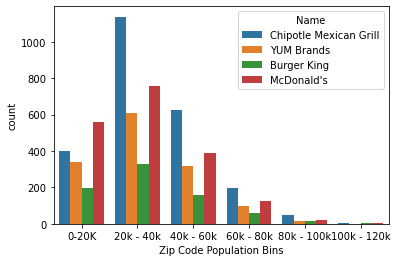

In [65]:
# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
sns_plot = sns.countplot(data=chart_all_rest,x='Zip Code Population Bins',hue='Name')
# sns_plot.savefig('Population_Bins_and_Locations.png')


In [66]:
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
census_2018['Zip Code Population Bins'] = pd.cut(census_2018['Population'], bins, labels = group_names, include_lowest =True)
census_2018['Zip Code Population Bins'].value_counts()

0-20K          26281
20k - 40k       4151
40k - 60k       1382
60k - 80k        337
80k - 100k        74
100k - 120k       16
Name: Zip Code Population Bins, dtype: int64

In [ ]:
sns_plot = sns.countplot(data=census_2018,x='Zip Code Population Bins',hue=census_2018['Zip Code'])

In [ ]:
all_rest_df.info()

In [ ]:
Chipotle = all_rest_df.loc[all_rest_df['Name']=='Chipotle Mexican Grill']

In [ ]:
lat,lon = Chipotle['Latitude'], Chipotle['Longitude']
Population, ZipcodeCount = Chipotle['Population'], Chipotle['Zip Code'].count()

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,c=np.log10(Population), cmap='viridis',s=ZipcodeCount, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)



In [60]:
x_values = Chipotle['Population']
y_values = Chipotle['Zip Code'].value_counts()


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-9,30),fontsize=15,color="red")
plt.xlim(-10, 85)
plt.ylim(10,95 )
plt.title('Chiptole Locations vs Population by Zip Code')
plt.xlabel('Chiptole Locations')
plt.ylabel('Population by Zip Code')
# plt.savefig('Outputs/Lat_vs_Temp_Northern.png')

print(f'The r-value is: {rvalue}')
print(y_values)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2629 and the array at index 1 has size 2332